In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
import os

# Set the OMP_NUM_THREADS environment variable
os.environ["OMP_NUM_THREADS"] = "1"

# Verify the environment variable is set
print(f"OMP_NUM_THREADS set to: {os.environ['OMP_NUM_THREADS']}")


OMP_NUM_THREADS set to: 1


In [3]:
#load dataset
customers_df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\data science assignment\Customers.csv")
transactions_df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\data science assignment\Products.csv")
products_df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\data science assignment\Transactions.csv")

In [4]:
# Data Preparation
# Merge transactions with product and customer data
transactions_df = transactions_df.merge(products_df, on='ProductID', how='left')
transactions_df = transactions_df.merge(customers_df, on='CustomerID', how='left')

In [5]:
# Feature engineering for customer profiles
customer_features = transactions_df.groupby('CustomerID').agg(
    total_transactions=('TransactionID', 'count'),
    unique_products=('ProductID', 'nunique')
).reset_index()


In [6]:
# Merge with customer demographic features
customer_profiles = customers_df.merge(customer_features, on='CustomerID', how='left')
customer_profiles = customer_profiles.fillna(0)  # Fill missing values with 0


In [7]:
# Standardize features
scaler = StandardScaler()
feature_columns = ['total_transactions', 'unique_products']
customer_profiles[feature_columns] = scaler.fit_transform(customer_profiles[feature_columns])


In [8]:
# Clustering
X = customer_profiles[feature_columns]


In [9]:
# Use the Elbow Method to determine the optimal number of clusters
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows wi

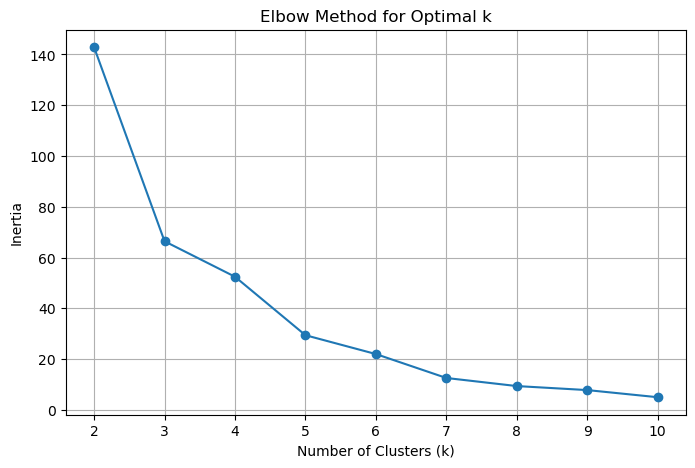

In [10]:

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [11]:
# Use the Elbow Method to determine the optimal number of clusters
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows wi

In [12]:
# Choose optimal k based on the elbow method (assume k=4 for this example)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X)
customer_profiles['Cluster'] = kmeans.labels_

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
# Evaluate Clustering
db_index = davies_bouldin_score(X, kmeans.labels_)
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 0.605443831521544
Silhouette Score: 0.5241166680044042


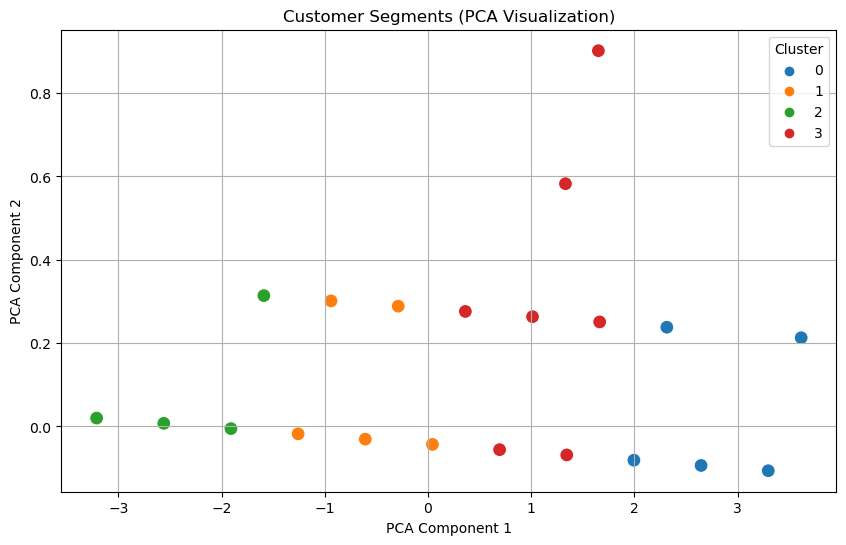

In [14]:
# Visualize Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
customer_profiles['PCA1'] = X_pca[:, 0]
customer_profiles['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_profiles, palette='tab10', s=100
)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [15]:
# Save results to a CSV
customer_profiles[['CustomerID', 'Cluster']].to_csv('Customer_Segments.csv', index=False)
print("Customer segmentation results saved to 'Customer_Segments.csv'")

# Report Summary
print("\nClustering Report:")
print(f"1. Number of clusters: {k_optimal}")
print(f"2. Davies-Bouldin Index: {db_index}")
print(f"3. Silhouette Score: {silhouette_avg}")


Customer segmentation results saved to 'Customer_Segments.csv'

Clustering Report:
1. Number of clusters: 4
2. Davies-Bouldin Index: 0.605443831521544
3. Silhouette Score: 0.5241166680044042
